<a href="https://colab.research.google.com/gist/obertas-artem/f9434ac38eea79d3f7ed5a51a16d4a18/13-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальный проект "Мобильные приложения"

* [Презентация](https://disk.yandex.ru/i/uTrcamg1P0cuVw)

* [Дaшбоард](https://public.tableau.com/views/_16966927235140/sheet4?:language=en-US&:display_count=n&:origin=viz_share_link)

## Описание проекта

Всем привет и добро пожаловать в команду сервиса «Ненужные вещи»!🚀
Мы жаждем увидеть в своём составе крутого аналитика, который возьмёт огромное количество наших данных и сотворит из них чудо. Конкретнее про чудо: наши пользователи совершают много действий в приложении, и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей.
«Ненужные вещи» — ваши ненужные вещи нужны кому-то другому!

## Задачи проекта:
* 1) Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей:
        1) В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов (Диаграмма Санкея)
        2) Построить воронки по основным сценариям в разрезе уникальных пользователей
        3) Как различается длительность сессий c `contacts_show` и без `contacts_show`
        4) Общий вывод по блоку?

* 2) Оцените, какие действия чаще совершают те пользователи, которые просматривают контакты:
        1) Рассчитать относительную частоту событий в разрезе двух групп пользователей:
            1) группа пользователей, которые смотрели контакты `contacts_show`
            2) группа пользователей, которые не смотрели контакты `contacts_show`
        2) Общий вывод по блоку?

## Декомпозиция проекта "Мобильные приложения"


1. Загрузка и знакомство с данными

2. Предобработка данных
* 1) Поиск дубликатов
* 2) Замена названий столбцов
* 3) Объединение датафреймов
* 4) Преобразование типов данных
* 5) Объединим события `contacts_show` и `show_contacts`
* 6) Общий вывод по блоку

3. Исследовательский анализ данных
* 1) За какой промежуток времени у нас данные?
* 2) Построим распределение событий по дням за все время
* 3) Построим распределение уникальных пользователей по дням
* 4) Построим боксплот событий по дням недели
* 5) Распределение пользователей по источнику привлечения
* 6) *Выделим сессии пользователей*
* 7) *Рассчитываем длительность сессий*
* 8) Возможно еще какие-то метрики ?
* 9) Общий вывод по блоку

4.  Основные вопросы исследования
* 1) Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей:
        1) В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов (Диаграмма Санкея)
        2) Построить воронки по основным сценариям в разрезе уникальных пользователей
        3) Как различается длительность сессий c `contacts_show` и без `contacts_show`
        4) Общий вывод по блоку?

* 2) Оцените, какие действия чаще совершают те пользователи, которые просматривают контакты:
        1) Рассчитать относительную частоту событий в разрезе двух групп пользователей:
            1) группа пользователей, которые смотрели контакты `contacts_show`
            2) группа пользователей, которые не смотрели контакты `contacts_show`
        2) Общий вывод по блоку?



5. Проверка гипотез
* 1) Одни пользователи совершают действия `tips_show` и `tips_click` , другие — только `tips_show`. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.
* 2) Некоторые пользователи используют приложение только днем[c 7:00 до 21:59], а другие - ночью[c 22:00 до 6:59]. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов

## Описание данных:
Датасет содержит данные о событиях, совершенных в мобильном приложении
`"Ненужные вещи"`. В нем пользователи продают свои ненужные вещи, размещая
их на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в
приложении после 7 октября 2019 года.

Датасет `mobile_dataset.csv` содержит колонки:
* `event.time`  — время совершения
* `event.name`  — название события
* `user.id`  — идентификатор пользователя

Датасет `mobile_sources.csv` содержит колонки:
* `userId`  — идентификатор пользователя
* `source`  — источник, с которого пользователь установил приложение


Расшифровки событий:
* `advert_open`  — открытие карточки объявления
* `photos_show`  — просмотр фотографий в объявлении
* `tips_show`  — пользователь увидел рекомендованные объявления
* `tips_click`  — пользователь кликнул по рекомендованному объявлению
* `contacts_show`  и  `show_contacts`  — пользователь нажал на кнопку "посмотреть номер
телефона" на карточке объявления
* `contacts_call`  — пользователь позвонил по номеру телефона на карточке
объявления
* `map`  — пользователь открыл карту размещенных объявлений
* `search_1  —  search_7`  — разные события, связанные с поиском по сайту
* `favorites_add`  — добавление объявления в избранное

## Импорт библиотек и настроек

In [1]:
import warnings
warnings.simplefilter('ignore')


import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import requests
from tqdm import tqdm
from pylab import rcParams
import math as mth
import scipy.stats as st


%config InlineBackend.figure_format = 'svg'
sns.set_theme(style='whitegrid')


pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', 0)
#pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:.2f}'.format


%matplotlib inline
rcParams['figure.figsize'] =10, 5

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
df_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
df_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
df_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
# посмотрим на количество пропусков и тип данных в `df_sourсes`
pd.concat(
    [df_sourсes.isna().sum().to_frame().rename(columns = {0:'Количество пропусков'}),
    round((df_sourсes.isna().mean().to_frame()*100).rename(columns = {0:'Процент пропусков'}), 2),
    df_sourсes.dtypes.to_frame().rename(columns = {0:'Тип данных'})], axis=1
    )

,Количество пропусков,Процент пропусков,Тип данных
userId,0,0.00,object
source,0,0.00,object


In [6]:
# посмотрим на количество пропусков и тип данных в `df_dataset`
pd.concat(
    [df_dataset.isna().sum().to_frame().rename(columns = {0:'Количество пропусков'}),
    round((df_dataset.isna().mean().to_frame()*100).rename(columns = {0:'Процент пропусков'}), 2),
    df_dataset.dtypes.to_frame().rename(columns = {0:'Тип данных'})], axis=1
    )

,Количество пропусков,Процент пропусков,Тип данных
event.time,0,0.00,object
event.name,0,0.00,object
user.id,0,0.00,object


In [7]:
df_dataset.describe()

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


In [8]:
df_sourсes.describe()

,userId,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


In [9]:
#посмотрим с каких источников приходили пользователи
df_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

In [10]:
#посмотрим какие события были у пользователей
df_dataset['event.name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
contacts_show    4450 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event.name, dtype: int64

### Вывод
Изучив два датасета можно заметить, что:
1) датасет `df_sourсes` - `(mobile_sources.csv)`:
   * содержит данные с информацией откуда пришел пользователь
   * количество строк в датасете совпадает с количеством уникальных пользователей в датасете
   * пропусков в датасете нет
   * тип данных в порядке
   * названия столбца `userId` следует привести к второму датафрейму

2) датасет `df_dataset` - `(mobile_dataset.csv)`:
   * содержит данные с информацией о действиях пользователей, с временной отметкой
   * количество уникальных пользователей совпадает с количеством уникальных пользователей из датафрейма `mobile_sources.csv`
   * наиболее частое событие - `tips_show` ??
   * есть пользователь, с количеством событий равному 478 ??
   * столбец `event.time` нужно поменять на временный тип данных
   * согласно ТЗ в столбце `event.name` события `contacts_show` и `show_contacts` одинаковые по смыслу, их стоит объединить

## Шаг 2. Предобработка данных

### 2.1 Поиск дубликатов
Проверим датафреймы на наличие дубликатов

In [11]:

print('Явных дубликатов в `df_dataset`:', df_dataset.duplicated().sum())
print('Явных дубликатов в `df_sourсes`:', df_sourсes.duplicated().sum())

Явных дубликатов в `df_dataset`: 0
Явных дубликатов в `df_sourсes`: 0


In [12]:
# посмотрим, вдруг какие то события в логах у некоторых пользователей продублировались:
df_dataset[df_dataset.duplicated(subset=['event.time', 'user.id'],keep=False) == True]

,event.time,event.name,user.id


### 2.2 Замена названий столбцов
Приведем названия всех повторяющихся по смыслу столбцов к одинаковым названиям

In [13]:
df_dataset.rename(columns={'user.id': 'user_id',
                           'event.name': 'event_name',
                           'event.time': 'event_time'}, inplace=True)

df_sourсes.rename(columns={'userId': 'user_id'}, inplace=True)

### 2.3 Объединение датафреймов
Соединим датафреймы в один, соединять будем по `user_id`

In [14]:
print('Размер датафрейма `df_dataset`:',df_dataset.shape)
print('Размер датафрейма `df_sourсes`:',df_sourсes.shape)

Размер датафрейма `df_dataset`: (74197, 3)
Размер датафрейма `df_sourсes`: (4293, 2)


In [15]:
df = df_dataset.merge(df_sourсes, on='user_id', how='left')
print('Размер объединенного датафрейма `df`:',df.shape)

Размер объединенного датафрейма `df`: (74197, 4)


In [16]:
df.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 4.8+ MB


### 2.4 Преобразование типов данных
Преобразуем тип данных у столбца `event_time`

In [18]:
# меняем тип данных на времянной
df['event_time'] = pd.to_datetime(df['event_time'],
               format='%Y-%m-%d %H:%M:%S')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.8+ MB


### 2.5 Объединим события `contacts_show` и `show_contacts`

In [20]:
# посмотрим,сколько событий с `contacts_show` и `show_contacts`
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
contacts_show    4450 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event_name, dtype: int64

In [21]:
# объединим события
df['event_name'].replace('contacts_show', 'show_contacts', inplace=True)

In [22]:
#проверим, что получилось
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
show_contacts    4529 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
Name: event_name, dtype: int64

#### Вывод
События `contacts_show` и `show_contacts` успешно объеденились в событие `show_contacts

## Шаг 3. Исследовательский анализ данных

# 3.1 Узнаем за какой промежуток времени у нас данные


In [23]:
min_date = df['event_time'].min()
max_date = df['event_time'].max()
print('Первое событие зафиксированно в:' ,min_date)
print('Последнее событие зафиксированно в', max_date)

Первое событие зафиксированно в: 2019-10-07 00:00:00.431357
Последнее событие зафиксированно в 2019-11-03 23:58:12.532487


In [24]:
print('Наблюдения есть за:' ,max_date - min_date)

Наблюдения есть за: 27 days 23:58:12.101130


### 3.2 Построим распределение событий по дням за все время


In [25]:
# добавим в таблицу столбецы с чистой датой и днем недели
df['dt'] = pd.to_datetime(df['event_time']).dt.date
df['dayofweek'] = pd.to_datetime(df['dt']).dt.strftime('%A')
df['dt'] = pd.to_datetime(df['dt'])

In [26]:
df.head()

,event_time,event_name,user_id,source,dt,dayofweek
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,Monday
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,Monday
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,Monday
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,Monday
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,Monday


In [27]:
temp_table_events = df.groupby(['dt', 'dayofweek'])['event_time'].agg('count').reset_index().rename(columns={'event_time': 'count_event'})
temp_table_events

,dt,dayofweek,count_event
0,2019-10-07,Monday,2545
1,2019-10-08,Tuesday,2499
2,2019-10-09,Wednesday,2027
3,2019-10-10,Thursday,2243
4,2019-10-11,Friday,2030
5,2019-10-12,Saturday,1843
6,2019-10-13,Sunday,2635
7,2019-10-14,Monday,3034
8,2019-10-15,Tuesday,2722
9,2019-10-16,Wednesday,2730


In [28]:
fig = px.bar(temp_table_events, x="dt", y="count_event",
             color="dayofweek", title="Распределение количества событий по дням",
             labels={'dayofweek':"   День недели",
                     'count_event': 'Событий в день',
                     'dt': 'Дата'},
             width= 950, height=700)
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5, title=dict(font=dict(size=20)),
                               legend=dict(font=dict(size=15)),
                               font=dict(size=15))
fig.show()


#### Вывод
По распределению событий по дням немного проглядывается  недельная мода, к выходным дням идет спад количества событий, а в будние, особенно в начале недели, наблюдается резкий рост. Должно быть, такое поведение связано с тем, что сервисом любят пользоваться в рабочее время.

### 3.3 Построим распределение уникальных пользователей по дням

In [29]:
temp_table_users = df.drop_duplicates(subset=['dt','dayofweek', 'user_id']).groupby(['dt', 'dayofweek'])['user_id'].agg('count').reset_index().rename(columns={'user_id': 'count_user'})
temp_table_users.head()

,dt,dayofweek,count_user
0,2019-10-07,Monday,204
1,2019-10-08,Tuesday,204
2,2019-10-09,Wednesday,227
3,2019-10-10,Thursday,233
4,2019-10-11,Friday,206


In [30]:
fig = px.bar(temp_table_users, x="dt", y="count_user",
             color="dayofweek", title="Распределение уникальных пользователей по дням",
             labels={'dayofweek':"   День недели",
                     'count_user': 'Уникальных пользователей в день',
                     'dt': 'Дата'},
             width= 950, height=700)
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5, title=dict(font=dict(size=20)),
                               legend=dict(font=dict(size=15)),
                               font=dict(size=15))
fig.show()

#### Вывод
В распределение по уникальным пользователям также сохраняется спад к концу недели, однако, в середине месяца наблюдается рост уникальных пользователей

### 3.4 Построим боксплот событий по дням недели

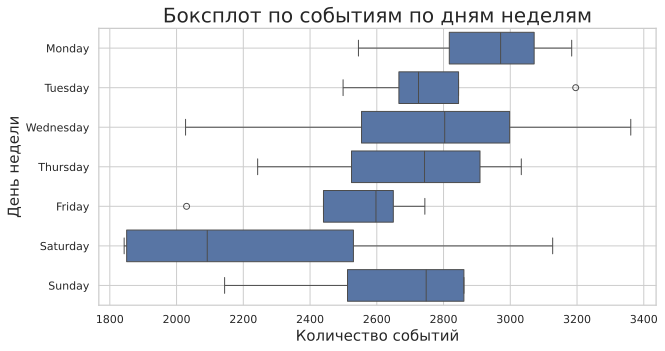

In [31]:
sns.boxplot(x="count_event", y="dayofweek", data=temp_table_events)
plt.grid(True)
plt.title('Боксплот по событиям по дням неделям', fontsize=20)
plt.xlabel('Количество событий', fontsize=15)
plt.ylabel('День недели', fontsize=15)
plt.show();

#### Вывод
Боксплот событий по дням недели отражает, что к концу недели происходит спад количества событий, особенно это видно в субботу.

### 3.5 Распределение пользователей по источнику привлечения

In [32]:
temp_table = df.groupby('source')['user_id'].nunique().reset_index().rename(columns={'user_id': 'user_count'}
                                                                              ).sort_values(by='user_count', ascending=False)
temp_table['percent'] = temp_table['user_count'] / sum(temp_table['user_count'])*100
temp_table

,source,user_count,percent
2,yandex,1934,45.05
1,other,1230,28.65
0,google,1129,26.30


In [33]:
fig = px.bar(temp_table, x='source', y='user_count',
             color='source', title="Распределение пользователей по источнику привлечения",
             labels={'source':"    Источник",
                     'user_count': 'Колличество клиентов'},
             width= 950, height=700)
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5, title=dict(font=dict(size=20)),
                               legend=dict(font=dict(size=15)),
                               font=dict(size=15))

fig.show()

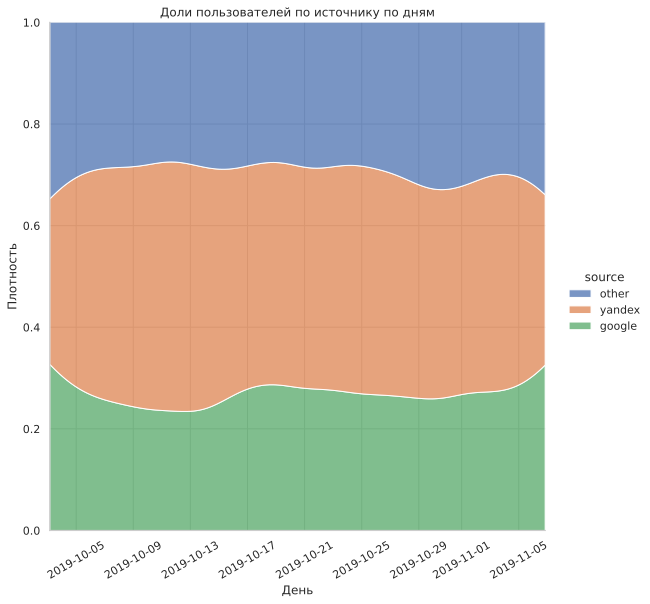

In [34]:
temp_df = df.drop_duplicates(subset=['user_id','dt'])
# посмотрим на плотность распределения клиентов по источнику привлечения по дням
sns.displot(
    data=temp_df ,
    x="dt", hue="source",
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    #palette="ch:rot=-1.995,hue=1.25,light=.85"
).set(
    title='Доли пользователей по источнику по дням',
    xlabel='День',
    ylabel='Плотность').set_xticklabels(rotation=30)
sns.color_palette("husl", 9);

#### Вывод


Пользователей, привлеченных с источников  `other`  и  `google`  примерно одинаковое количество, группа пользователей, привлеченных с источника  `yandex`  сильно больше. График плотности пользователей по дням показывает, что в среднем, пропорции пользователей сохраняются, сильного перепада в какие-то дни нет.

### 3.6 Выделяем сессии пользователей

In [35]:
#сортируем по юзеру и ивент тайм для наглядности
df = df.sort_values(['user_id', 'event_time'])
#считаем разницу во времени между событиями
df['delta_time'] = df.groupby(['user_id'])['event_time'].diff()
#смотрим
df.head()

,event_time,event_name,user_id,source,dt,dayofweek,delta_time
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,NaT
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,0 days 00:00:45.063550
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,0 days 00:00:34.669580
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,0 days 00:02:15.012972
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,0 days 00:02:10.182041


In [36]:
df.describe()

,delta_time
count,69904
mean,0 days 03:53:01.169952121
std,1 days 01:32:57.259354294
min,0 days 00:00:00.000001
25%,0 days 00:00:23.594245250
50%,0 days 00:01:10.535313
75%,0 days 00:03:00.300498750
max,26 days 13:49:54.853516


Микровывод

Посчитали сколько времени проходило у пользователя между событиями, первое событие пользователя не имеет временной отметки. Построим распределения этих дельт, а так как нам нужно понять, спустя сколько времени без действий можно сказать, что пользователь закончил свою сессию, то мы можем сразу откинуть данные с большой дельтой.

In [37]:
#поменяем время на секунды
df['delta_time'] = df['delta_time'].apply(lambda x: x.total_seconds())

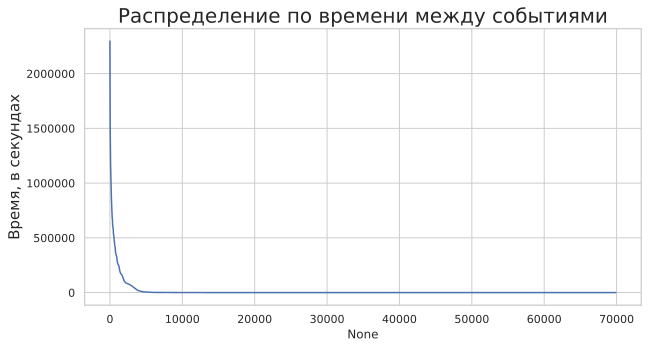

In [38]:
temp_df=df.sort_values(by='delta_time', ascending=False).reset_index()

sns.lineplot(x=temp_df.index, y=temp_df['delta_time'],
             data=temp_df
)
plt.grid(True)
plt.title('Распределение по времени между событиями', fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

Дельты времени были посчитаны на данных, заранее отсортированным по пользователю и времени, а при построении графика дельты заново отсортированы по возрастанию, это позволяет нам определить скачок в значениях дельты, который указывает, что следующая сессия уже была через длительный отрезок времени. По данному графику видно, что у ~66 тысяч строк дельта маленькая, а дальше идет рост, но масштаб очень маленький. Нужно определить разрыв больше какого времени мы определим как 100% завершение сессии, это нужно, чтобы рассмотреть график в более крупном масштабе. Будем считать, что дельта равная 60 минутам означает завершение сессии.

In [39]:
#Посмотрим, от какой процент данных больше
print('Данных больше 60 минут: {:.2f} %'.format(len(df[df['delta_time'] >= 60*60]) / len(df) * 100))
print('Данных больше 30 минут: {:.2f} %'.format(len(df[df['delta_time'] >= 60*30]) / len(df) * 100))
print('Данных больше 15 минут: {:.2f} %'.format(len(df[df['delta_time'] >= 60*15]) / len(df) * 100))
print('Данных больше 10 минут: {:.2f} %'.format(len(df[df['delta_time'] >= 60*10]) / len(df) * 100))
print('Данных больше 5 минут: {:.2f} %'.format(len(df[df['delta_time'] >= 60*5]) / len(df) * 100))

Данных больше 60 минут: 7.12 %
Данных больше 30 минут: 8.19 %
Данных больше 15 минут: 9.76 %
Данных больше 10 минут: 11.32 %
Данных больше 5 минут: 16.27 %


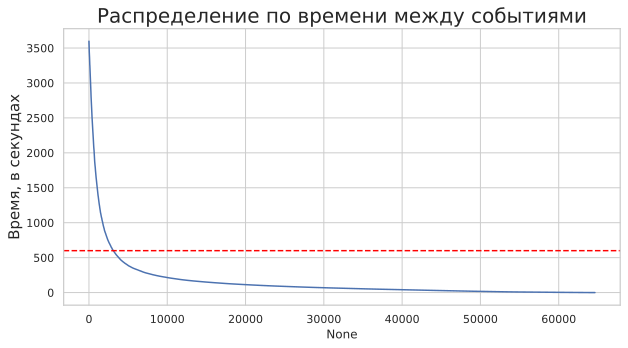

In [40]:
# Строим график с дельтой до 1 часа

temp_df=df[df['delta_time'] < 60*60].sort_values(by='delta_time', ascending=False).reset_index()

sns.lineplot(x=temp_df.index, y=temp_df['delta_time'],
             data=temp_df
)
plt.grid(True)
plt.title('Распределение по времени между событиями', fontsize=20)
plt.axhline(y=600, color='red', linestyle='--')
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

Определим дельту равную больше 600 секунд, как маркер того, что сессия закончилась, так как на графике видно, что при показателе дельты в ~600 секунд, значение дельты резко увеличивается

In [41]:
df = df.sort_values(['user_id', 'event_time'])
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('10Min')).cumsum()
#create counter of groups
df['session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1

In [42]:
# сколько получилось сессий?
df['session_id'].max()

12691

### 3.7 Рассчитываем длительность сессий

In [43]:
temp_session_time = df.groupby('session_id')['delta_time'].apply(lambda x: x.iloc[1:].sum()).reset_index().rename(columns={'delta_time': 'session_time'})
temp_session_time.head()

,session_id,session_time
0,1,595.73
1,2,507.39
2,3,899.27
3,4,758.17
4,5,738.69


In [44]:
df = df.merge(temp_session_time, on = 'session_id', how='inner')
#df['session_time'] = df['session_time'].astype('int')
df.head()

,event_time,event_name,user_id,source,dt,dayofweek,delta_time,session_id,session_time
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,NaN,1,595.73
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,45.06,1,595.73
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,34.67,1,595.73
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,135.01,1,595.73
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,130.18,1,595.73


In [45]:
#что вышло?
df.drop_duplicates(subset=['session_id', 'session_time'])['session_time'].value_counts().head()

0.00      3175
595.73    1   
290.65    1   
226.54    1   
666.65    1   
Name: session_time, dtype: int64

Очень много нулевых значений длительности сессий, такое могло получиться из-за нашего способов выделения айди сессий. Здесь стоит понимать, что длительность сессий мы считали как сумму дельт, между событиями. Если событие было одно, то дельты просто не существует. Однако, здесь мы можем принять решение, что делать с такими данными. Это не просто нулевая сессия, это, либо сессия с одним событием и нам не хватает данных для расчета ее длительности, либо это сессия с длительностью равной нашей раннее установленной границей в 10 минут и, при этом, одним событием, но тогда и к длительности всех остальных сессий нужно прибавлять 10 минут "бездействия". К тому же, мы не можем однозначно понять природу этих нулевых длительностей, возможно, это ошибка лога или миссклик пользователя, а эти данные не несут ценности для анализа, поэтому, принимаю решение назначить нулевым сессиям значение `nan`

In [46]:
df.drop_duplicates(subset=['session_id', 'session_time'])['session_time'].describe()

count   12691.00
mean    448.48  
std     698.84  
min     0.00    
25%     0.00    
50%     200.98  
75%     607.59  
max     11543.26
Name: session_time, dtype: float64

In [47]:
# меняем нули на нан
df['session_time'] = df['session_time'].replace(0, np.nan)

In [48]:
df.drop_duplicates(subset=['session_id', 'session_time'])['session_time'].describe()

count   9516.00 
mean    598.12  
std     749.56  
min     0.00    
25%     130.97  
50%     366.79  
75%     787.18  
max     11543.26
Name: session_time, dtype: float64

In [49]:
#посмотрим, как раcпределяются события с ровно нулевым значением длительности сессии
df[df['session_time'].isna()]['event_name'].value_counts()

tips_show        1414
photos_show      747 
search_1         460 
show_contacts    212 
map              146 
advert_open      64  
favorites_add    54  
search_5         34  
tips_click       23  
search_3         12  
search_4         5   
search_7         3   
search_6         1   
Name: event_name, dtype: int64

In [50]:
print('Доля нулевых сессий: {:.2f}%'.format(df[df['session_time'].isna()].drop_duplicates(subset=['session_id']).shape[0] /
      df.drop_duplicates(subset=['session_id']).shape[0]*100, 2))

Доля нулевых сессий: 25.02%


#### Вывод

При расчете длительности сессий мы столкнулись с проблемой нулевых сессий, которые появились, скорее всего, из-за нашего способов выделения сессий пользователей, было принято решение заменить нулевые сессий на `nan`. Помимо тех сессий, которые равны ровно нулю, еще есть экстремально короткие сессии, которые вызывают подозрение.


### 3.8 Расчитываем количество событий за сессию и количество уникальных событий за сессию

In [51]:
#всего событий за сессию
temp_event_count = df.groupby('session_id')['event_name'].agg('count').reset_index().rename(columns={'event_name': 'session_event_count'})
temp_event_count.head()

,session_id,session_event_count
0,1,9
1,2,4
2,3,14
3,4,8
4,5,7


In [52]:
temp_event_count['session_event_count'].describe()

count   12691.00
mean    5.85    
std     7.88    
min     1.00    
25%     1.00    
50%     3.00    
75%     7.00    
max     139.00  
Name: session_event_count, dtype: float64

В среднем, на одну сессию приходится около 6 событий, первый квартиль находится на значении 1, значит 25% сессий имеют одно(или меньше, но тут меньше не может быть) событие. Это могут быть, как раз, сессии, в которых открыли приложение и больше ничего не сделали. Также 25% сессий имеют 7 или больше событий. Посмотрим, какая ситуация будет, если убрать повторяющиеся события, в рамках сессии.

In [53]:
#уникальных событий за сессию
temp_unique_event_count = df.drop_duplicates(subset=['session_id', 'event_name']).groupby('session_id')['event_name'].agg('count').reset_index().rename(
    columns={'event_name': 'session_unique_event_count'})
temp_unique_event_count.head()

,session_id,session_unique_event_count
0,1,1
1,2,2
2,3,2
3,4,2
4,5,2


In [54]:
temp_unique_event_count['session_unique_event_count'].describe()

count   12691.00
mean    1.73    
std     1.04    
min     1.00    
25%     1.00    
50%     1.00    
75%     2.00    
max     9.00    
Name: session_unique_event_count, dtype: float64

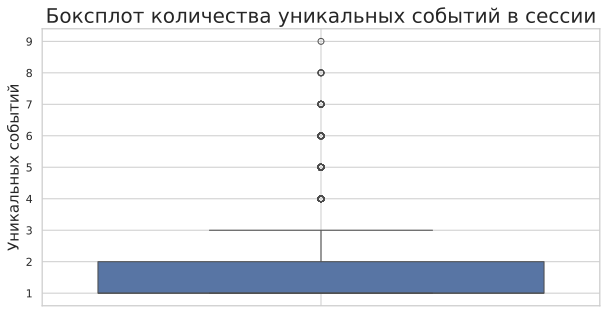

In [55]:
sns.boxplot(y=temp_unique_event_count['session_unique_event_count'], data=temp_unique_event_count)
plt.grid(True)
plt.title('Боксплот количества уникальных событий в сессии', fontsize=20)
plt.ylabel('Уникальных событий', fontsize=15)
plt.show();

#### Вывод
В случае сессий, с уникальными событиями наблюдается следующая ситуация:
 1) Среднее арифметическое на датасет равно `1.73` события на сесиию
 2) Межквартильный размах лежит между `1` и `2` действия, а нижний усик также находится на значении равном `1`, значит, `75%` сессий имеет 2 или меньше события.
 3) Верхний ус лежит на значении `3`, значит, `95%` сессий имеет 3 или меньше событий


### 3.9 Расчет Retention Rate

In [56]:
#определим первые визиты в столбце firts_ts для каждого пользователя
first_ts = df.groupby(['user_id'])['dt'].min().reset_index().rename(columns={'dt': 'first_ts'})
#присоеденим первые визиты к общему датафрейму
df = df.merge(first_ts, on = 'user_id', how='inner')
#определим начало сессий
session_start = df.groupby(['session_id'])['dt'].min().reset_index().rename(columns={'dt': 'session_start'})
# присоединяем к общему датасету
df = df.merge(session_start, on = 'session_id', how='inner')
df.head()

,event_time,event_name,user_id,source,dt,dayofweek,delta_time,session_id,session_time,first_ts,session_start
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,NaN,1,595.73,2019-10-07,2019-10-07
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,45.06,1,595.73,2019-10-07,2019-10-07
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,34.67,1,595.73,2019-10-07,2019-10-07
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,135.01,1,595.73,2019-10-07,2019-10-07
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,130.18,1,595.73,2019-10-07,2019-10-07


In [57]:
# вычисляем лайфтайм для каждой сессии в днях

df['lifetime'] = (
    df['session_start'] - df['first_ts']
).dt.days


df['first_ts'] = pd.to_datetime(df['first_ts']).apply(lambda x: x.date())


df.head()

,event_time,event_name,user_id,source,dt,dayofweek,delta_time,session_id,session_time,first_ts,session_start,lifetime
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,NaN,1,595.73,2019-10-07,2019-10-07,0
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,45.06,1,595.73,2019-10-07,2019-10-07,0
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,34.67,1,595.73,2019-10-07,2019-10-07,0
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,135.01,1,595.73,2019-10-07,2019-10-07,0
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,Monday,130.18,1,595.73,2019-10-07,2019-10-07,0


In [58]:
def get_retention(
    df, observation_date, horizon_days, ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = df.query('first_ts <= @last_suitable_acquisition_date')

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['first_ts'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('first_ts')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='first_ts', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания
    return result_grouped

In [59]:
retention = get_retention(df, datetime(2019, 11, 3).date(), 14)
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_ts,,,,,,,,,,,,,,,
2019-10-07,204,1.00,0.18,0.10,0.11,0.07,0.05,0.04,0.08,0.06,0.05,0.07,0.04,0.02,0.03
2019-10-08,167,1.00,0.17,0.12,0.10,0.04,0.04,0.07,0.05,0.07,0.05,0.06,0.04,0.02,0.04
2019-10-09,176,1.00,0.09,0.09,0.06,0.06,0.08,0.06,0.06,0.06,0.05,0.02,0.02,0.04,0.04
2019-10-10,174,1.00,0.13,0.07,0.10,0.07,0.09,0.06,0.07,0.06,0.06,0.04,0.05,0.05,0.06
2019-10-11,136,1.00,0.08,0.07,0.13,0.10,0.07,0.06,0.07,0.02,0.00,0.05,0.04,0.04,0.04
2019-10-12,125,1.00,0.20,0.12,0.10,0.06,0.07,0.10,0.08,0.07,0.06,0.06,0.06,0.05,0.06
2019-10-13,148,1.00,0.17,0.09,0.05,0.07,0.06,0.04,0.08,0.05,0.06,0.01,0.04,0.02,0.06
2019-10-14,185,1.00,0.17,0.09,0.10,0.10,0.07,0.05,0.05,0.05,0.05,0.04,0.03,0.04,0.04
2019-10-15,186,1.00,0.15,0.10,0.09,0.06,0.05,0.06,0.07,0.09,0.03,0.04,0.02,0.03,0.04


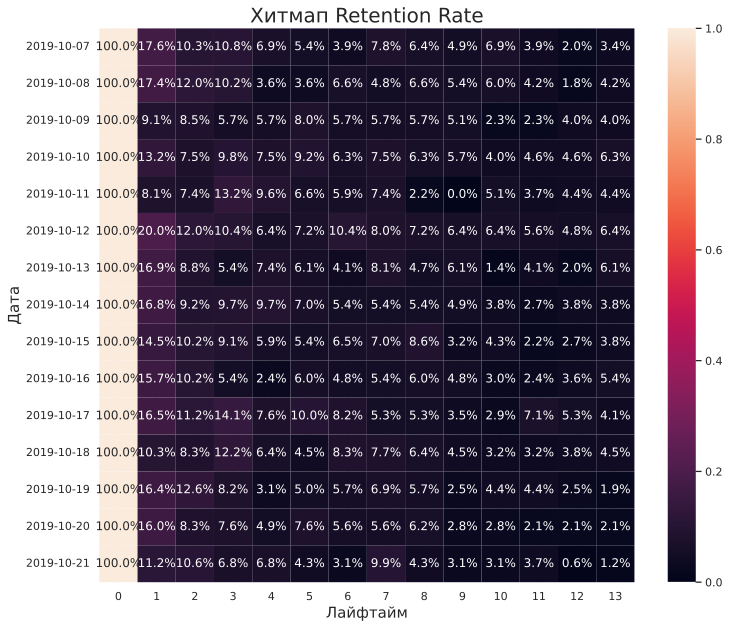

In [60]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(retention.drop(columns=['cohort_size']), annot=True, fmt='.1%', ax=ax)
plt.title('Хитмап Retention Rate', fontsize=20)
plt.xlabel('Лайфтайм', fontsize=15)
plt.ylabel('Дата', fontsize=15)
plt.show();

#### Вывод
Возвращаемость пользователей на второй лайфтайм держится между 8.1% и 20%, что не очень хорошо и является резким спадом. В когортах, начавших в середине месяца показатели держатся лучше и, даже, на 14 день показатели могут сохраняться на уровне 4-6% возвращаемости

### 3.10 Общий вывод по блоку
Проведя исследовательский анализ можно сделать следующие выводы:
* Перед нами данные за 28 дней, данные по дням распределены нормально, наблюдается "недельная" мода у событий и уникальных пользователей
* Пользователей, привлеченных с помощью `yandex` - `46.2%`, `google` - `27.6%`, `other` - `26.2%`
* Таймаут для выделения сессии установили на значении 10 мин
* После выделения сессий пользователей, появились сессии, с ровно нулевым значением длительности сессии и таких сессий `25%`, то есть у таких сессий нет второго, закрывающего события в рамках одной сессии, то есть либо таймаут в 10 мин слишком короткий, либо это сессии, в который просто произошло одно событие и все
* В среднем, за сессию происходит `6` событий, этот же показатель для уникальных событий за сессию равен `1.73`, данное знание пригодится для выявления самых популярных сценариев событий

## Шаг 4. Основные вопросы исследования

### 4.1 Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей:
1) В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов (Диаграмма Санкея)
  2) Построить воронки по основным сценариям в разрезе уникальных пользователей
  3) Как различается длительность сессий c `contacts_show` и без `contacts_show`
  4) Общий вывод по блоку?

#### 4.1.1 В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов (Диаграмма Санкея)

In [61]:
#размер основного датасета
df.shape

(74197, 12)

In [62]:
#объединим события `search_1` - `search_7` в один `search`
sankey_df = df.copy()
sankey_df['event_name'] = sankey_df['event_name'].str.replace('search_\d+', 'search', regex=True)
#убираем повторяющиеся события, в рамках сессий
sankey_df = sankey_df.drop_duplicates(subset=['session_id', 'event_name'])
#размер того, что осталось
sankey_df.shape

(20445, 12)

In [63]:
sankey_df['event_name'].unique()

array(['tips_show', 'map', 'search', 'photos_show', 'favorites_add',
       'show_contacts', 'contacts_call', 'advert_open', 'tips_click'],
      dtype=object)

In [64]:
def add_features(df):

    """Функция генерации новых столбцов для исходной таблицы

    Args:
        df (pd.DataFrame): исходная таблица.
    Returns:
        pd.DataFrame: таблица с новыми признаками.
    """

    # сортируем по id и времени
    sorted_df = df.sort_values(by=['session_id', 'event_time']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('session_id').cumcount() + 1

    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('session_id')['source'].shift(-1)

    # возврат таблицы без имени событий
    return sorted_df.drop(['event_name'], axis=1)


In [65]:
# преобразуем таблицу
sankey_df = add_features(sankey_df)
sankey_df.head()

,event_time,user_id,source,dt,dayofweek,delta_time,session_id,session_time,first_ts,session_start,lifetime,step,target
0,2019-10-07 13:39:45.989359,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-07,Monday,NaN,1,595.73,2019-10-07,2019-10-07,0,1,NaN
9,2019-10-09 18:33:55.577963,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,2019-10-09,Wednesday,189853.86,2,507.39,2019-10-07,2019-10-09,2,1,tips_show
11,2019-10-09 18:40:28.738785,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-09,Wednesday,300.48,2,507.39,2019-10-07,2019-10-09,2,2,NaN
13,2019-10-21 19:52:30.778932,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-21,Monday,1041007.81,3,899.27,2019-10-07,2019-10-21,14,1,map
15,2019-10-21 19:53:38.767230,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,2019-10-21,Monday,21.60,3,899.27,2019-10-07,2019-10-21,14,2,NaN


In [66]:
# удалим все пары source-target, шаг которых превышает 3, отталкиваясь от рассуждений в пункте 3.8
# и сохраним полученную таблицу в отдельную переменную
df_comp = sankey_df[sankey_df['step'] <= 3].copy().reset_index(drop=True)

In [67]:
def get_source_index(df):

    """Функция генерации индексов source

    Args:
        df (pd.DataFrame): исходная таблица с признаками step, source, target.
    Returns:
        dict: словарь с индексами, именами и соответсвиями индексов именам source.
    """

    res_dict = {}

    count = 0
    # получаем индексы источников
    for no, step in enumerate(df['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1

    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict


# создаем словарь
source_indexes = get_source_index(df_comp)

In [68]:
def generate_random_color():

    """Случайная генерация цветов rgba

    Args:

    Returns:
        str: Строка со сгенерированными параметрами цвета
    """

    # сгенерим значение для каждого канала
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

In [69]:
def colors_for_sources(mode):

    """Генерация цветов rgba

    Args:
        mode (str): сгенерировать случайные цвета, если 'random', а если 'custom' -
                    использовать заранее подготовленные
    Returns:
        dict: словарь с цветами, соответствующими каждому индексу
    """
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}

    if mode == 'random':
        # генерим случайные цвета
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'

    elif mode == 'custom':
        # присваиваем ранее подготовленные цвета
        colors = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(df_comp['source'].unique()):
            colors_dict[label] = colors['custom_colors'][no]

    return colors_dict


# генерю цвета из своего списка
colors_dict = colors_for_sources(mode='custom')

In [70]:
def percent_users(sources, targets, values):

    """
    Расчет уникальных id в процентах (для вывода в hover text каждого узла)

    Args:
        sources (list): список с индексами source.
        targets (list): список с индексами target.
        values (list): список с "объемами" потоков.

    Returns:
        list: список с "объемами" потоков в процентах
    """

    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))

    new_list = []

    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}

    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl

    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))

    return new_list

In [71]:
def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):

    """
    Создаем необходимые для отрисовки диаграммы переменные списков и возвращаем
    их в виде словаря

    Args:
        source_indexes (dict): словарь с именами и индексами source.
        colors (dict): словарь с цветами source.
        frac (int): ограничение на минимальный "объем" между узлами.

    Returns:
        dict: словарь со списками, необходимыми для диаграммы.
    """

    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу
    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indexes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])

    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)

    # добавим значения процентов для howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")

    # возвратим словарь с вложенными списками
    return {'sources': sources,
            'targets': targets,
            'values': values,
            'labels': labels,
            'colors_labels': colors_labels,
            'link_color': link_color,
            'link_text': link_text}


# создаем словарь
data_for_plot = lists_for_plot()

Шаг: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]


In [72]:
def plot_senkey_diagram(data_dict=data_for_plot):

    """
    Функция для генерации объекта диаграммы Сенкей

    Args:
        data_dict (dict): словарь со списками данных для построения.

    Returns:
        plotly.graph_objs._figure.Figure: объект изображения.
    """

    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Sankey Diagram", font_size=10, width=950, height=1000)

    # возвращаем объект диаграммы
    return fig


# сохраняем диаграмму в переменную
senkey_diagram = plot_senkey_diagram()

In [73]:
senkey_diagram.show()

In [74]:
#senkey_diagram.write_html('demo_senkey.html', auto_open=True)

Выделим три сценария поведения пользователей, свершивших целевое действие, на основанни таблицы Санкея
1) `search` - `photos_show` - `show_contacts`
2) `search` - `tips_show` - `show_contacts`
3) `map` - `tips_show` - `show_contacts`
4) `tips_show` - `show_contacts`

In [75]:
# запишем их в массив
scripts = [['search', 'photos_show', 'show_contacts'],
           ['search', 'tips_show', 'show_contacts'],
           ['map', 'tips_show', 'show_contacts'],
           ['tips_show', 'show_contacts']]

#### 4.1.2 Построить воронки по основным сценариям в разрезе уникальных пользователей

In [76]:
#Напишем функцию, которая будет строить воронку, согласно указанному нами сценарию
def funnel_graf(script_names, df):
    #создаем пустой список значений количества уникальных пользователей нашего сценария
    script_values = []
    #найдем список уникальных пользователей, сценарий которых начался с первого события
    lvl1 = df[(df['source'] == script_names[0]) & (df['step'] == 1)]['user_id'].unique()
    #добавляем в конец списка количество пользователей из первого уровеня воронки
    script_values.append(len(lvl1))

    #оставим в датасете только тех пользователей, кто попал в первый уровень воронки
    df = df[df['user_id'].isin(lvl1)]

    #считаем значение уникальных пользователей, которые дошли до второго события
    #если длина сценария 2 шага:
    if len(script_names) == 2:
        #найдем список уникальных пользователей, сценарий которых закончился целевым действием 'show_contacts'
        lvl2 = df[(df['source'] == script_names[len(script_names)-2]) & (df['step'] == len(script_names)-1) & (df['target'] == 'show_contacts')]['user_id'].unique()
        #добавляем в конец списка  количество пользователей дошедших до целевого действия
        script_values.append(len(lvl2))


    #если длина сценария 3 шага:
    elif len(script_names) == 3:
        #составим список юзеров, попавших на уровень 2
        lvl2 = df[(df['source'] == script_names[len(script_names)-2]) & (df['step'] == len(script_names)-1)]['user_id'].unique()
        #оставим в датасете только тех пользователей, кто попал в во второй уровень воронки
        df = df[df['user_id'].isin(lvl2)]
    #добавляем в конец списка  количество пользователей из второго уровеня воронки
    script_values.append(len(lvl2))


    if len(script_names) == 3:
        #найдем список уникальных пользователей, сценарий которых закончился целевым действием 'show_contacts'
        lvl3 = df[(df['source'] == script_names[len(script_names)-2]) & (df['step'] == len(script_names)-1) & (df['target'] == 'show_contacts')]['user_id'].unique()
        #добавляем в конец списка  количество пользователей дошедших до целевого действия
        script_values.append(len(lvl3))




    fig = go.Figure(
        go.Funnel(
            y=script_names,
            x=script_values,
            textposition = "inside",
            textinfo = "value+percent initial",

        )
    )
    "Dictionary Representation of A Graph Object:\n\n" + str(fig.to_dict())
    fig.update_layout(title='Воронка "' + ' - '.join(i)+'"', title_x=0.5
                   )
    return fig.show()

In [77]:
for i in scripts:
    funnel_graf(script_names = i, df=df_comp)

##### Вывод
Лучшая конверсия в целевое действие у воронки из 3х событий у сценария  - `'map' - 'tips_show' - 'show_contacts'`, конверсия в целевое действие составляет `9%`, среди всех построенных воронок, лучшая конверсия у сценария из двух событий - `'tips_show' - 'show_contacts'` - `14%`, думаю, что данные показатели можно считать вполне успешынми.


#### 4.1.3 Как различается длительность сессий c `contacts_show` и без `contacts_show`

In [78]:
#выделим список айди сессий с событием `show_contacs`
with_show_contacts = df[df['event_name']=='show_contacts']['session_id'].unique()

In [79]:
#Сделаем два датафрейма, один с `show_contacs`
df_with = df[df['session_id'].isin(with_show_contacts) == True]
#Поставим макрет, что событие в сессии было
df_with['is_show_contacts'] = 'true'
#Другой датафрейм без `show_contacs`
df_without = df[df['session_id'].isin(with_show_contacts) == False]
#Также маркер
df_without['is_show_contacts'] = 'false'
#что вышло
print('Размрер датафрейма с `show_contacs`', df_with.shape)
print('Размрер датафрейма без `show_contacs`', df_without.shape)


Размрер датафрейма с `show_contacs` (15032, 13)
Размрер датафрейма без `show_contacs` (59165, 13)


In [80]:
#склеиваем обратно
temp_df = pd.concat([df_with, df_without])
temp_df.shape

(74197, 13)

In [81]:
#выделим только уникальные сессии
temp_df_unique = temp_df.drop_duplicates(subset=['session_id','session_time', 'user_id']).sort_values(by='session_time', ascending=False).reset_index()

In [82]:
temp_df_unique.head()

,index,event_time,event_name,user_id,source,dt,dayofweek,delta_time,session_id,session_time,first_ts,session_start,lifetime,is_show_contacts
0,48546,2019-10-27 01:24:21.470458,advert_open,abc47bf2-6ed0-432b-bc23-bd1adf4f29bc,other,2019-10-27,Sunday,NaN,8355,11543.26,2019-10-27,2019-10-27,0,true
1,64064,2019-11-02 19:46:32.070805,tips_show,dd61b125-4b5f-4312-82dc-dcc431980265,other,2019-11-02,Saturday,1296776.74,11041,10803.82,2019-10-12,2019-11-02,21,false
2,67314,2019-10-22 19:57:56.938702,search_7,e549f8ef-653b-4c5c-a6bd-8970e6bd860b,google,2019-10-22,Tuesday,935826.76,11508,9889.94,2019-10-11,2019-10-22,11,true
3,48934,2019-10-29 14:37:20.170941,tips_show,abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,google,2019-10-29,Tuesday,1332.76,8394,9748.15,2019-10-11,2019-10-29,18,false
4,16816,2019-10-19 16:58:19.041839,map,3615463b-be22-4167-819c-324affd368a1,other,2019-10-19,Saturday,435879.98,2832,8700.17,2019-10-14,2019-10-19,5,false


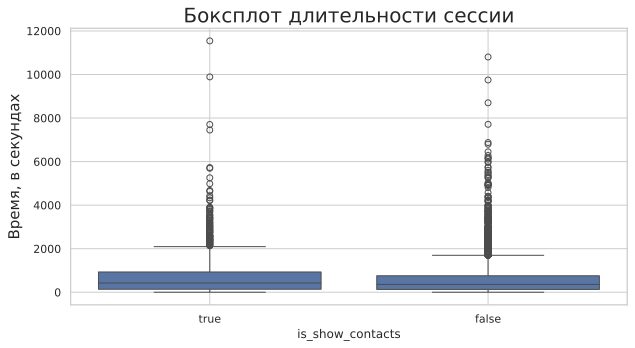

In [83]:
sns.boxplot(x=temp_df_unique['is_show_contacts'], y=temp_df_unique['session_time'], data=temp_df_unique)
plt.grid(True)
plt.title('Боксплот длительности сессии', fontsize=20)
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

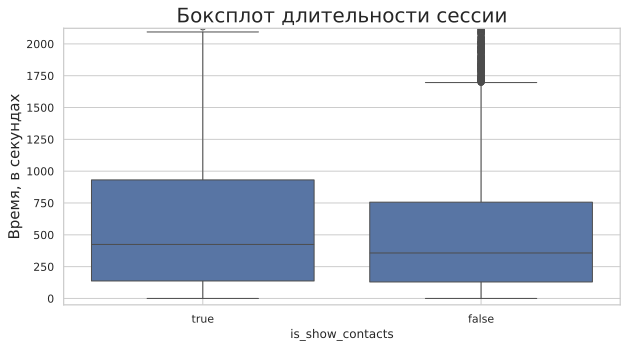

In [84]:
sns.boxplot(x=temp_df_unique['is_show_contacts'], y=temp_df_unique['session_time'], data=temp_df_unique)
plt.ylim(-50, (temp_df_unique[temp_df_unique['is_show_contacts']=='true']['session_time'].quantile(0.75) -
               temp_df_unique[temp_df_unique['is_show_contacts']=='true']['session_time'].quantile(0.25))*1.5 +
               temp_df_unique[temp_df_unique['is_show_contacts']=='true']['session_time'].quantile(0.75))
plt.grid(True)
plt.title('Боксплот длительности сессии', fontsize=20)
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

In [85]:
temp_df_unique[temp_df_unique['is_show_contacts'] == 'true']['session_time'].describe()

count   1775.00 
mean    686.45  
std     866.35  
min     0.00    
25%     137.28  
50%     424.19  
75%     931.25  
max     11543.26
Name: session_time, dtype: float64

In [86]:
temp_df_unique[temp_df_unique['is_show_contacts'] == 'false']['session_time'].describe()

count   7741.00 
mean    577.87  
std     718.65  
min     0.00    
25%     129.58  
50%     357.52  
75%     756.36  
max     10803.82
Name: session_time, dtype: float64

##### Вывод
Среднее арифметическое и медианное значение длительности сессии с целевым действием больше, чем у всех остальных сессий. Максимальные значения длительности сессии держатся на показателе чуть больше 3 часов, что не вызывает подозрения, но учитывая, что все сессии с нулевым значением ранее мы заменили на `np.nan`, то факт того, что нижний усик все равно лежит на нуле на двух боксплотах, можно сделать вывод, что и там и там присутствуют сессии с экстремально низкой длительностью. Возможно, это два случайно свершившихся события, например, мисклик по приложению или особенность лога

Если посмотреть поближе, то:

In [87]:
#срез сессий длительности (0; 1)
temp_df_unique.query('session_time > 0 & session_time < 1').shape

(107, 14)

In [88]:
#срез сессий длительности [0; 1)
temp_df_unique[temp_df_unique['session_time']<1].shape

(107, 14)

In [89]:
#сессии с длительностью <1 сек и подсчет событий в сессии
df[df['session_id'].isin(temp_df_unique[temp_df_unique['session_time']<1]['session_id'])].groupby('session_id')['event_name'].agg('count').reset_index(
).rename(columns={'event_name': 'session_event_count'}).sort_values(by='session_event_count', ascending=False).head(10)

,session_id,session_event_count
99,12016,8
40,4709,5
24,2797,3
43,5010,3
36,4691,3
48,5288,3
64,7592,3
56,6461,3
34,4646,3
52,6115,3


### 4.2 Оцените, какие действия чаще совершают те пользователи, которые просматривают контакты:

#### 4.2.1 Рассчитать относительную частоту событий в разрезе двух групп пользователей:

##### 4.2.1.1 Группа пользователей, которые смотрели контакт `show_contact`

In [90]:
event_rate_df = temp_df.copy()
#еще раз для анализа частоты событий объединим `search`
event_rate_df['event_name'] = event_rate_df['event_name'].str.replace('search_\d+', 'search', regex=True)
#сделаем табличку для анализа и графиков по группе c совершенным события
event_rate_groupby_t = event_rate_df[event_rate_df['is_show_contacts'] == 'true']['event_name'].value_counts().reset_index(
).rename(columns={'index': 'event_name', 'event_name': 'events_counts_t'})
event_rate_groupby_t['ratio_true'] = round(event_rate_groupby_t['events_counts_t'] /
                                           sum(event_rate_groupby_t['events_counts_t'])*100, 2)
event_rate_groupby_t

,event_name,events_counts_t,ratio_true
0,tips_show,6481,43.11
1,show_contacts,4529,30.13
2,photos_show,1278,8.50
3,search,757,5.04
4,advert_open,627,4.17
5,contacts_call,541,3.60
6,map,448,2.98
7,favorites_add,207,1.38
8,tips_click,164,1.09


In [91]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 44 to 74196
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   event_time        74197 non-null  datetime64[ns]
 1   event_name        74197 non-null  object        
 2   user_id           74197 non-null  object        
 3   source            74197 non-null  object        
 4   dt                74197 non-null  datetime64[ns]
 5   dayofweek         74197 non-null  object        
 6   delta_time        69904 non-null  float64       
 7   session_id        74197 non-null  int64         
 8   session_time      71022 non-null  float64       
 9   first_ts          74197 non-null  object        
 10  session_start     74197 non-null  datetime64[ns]
 11  lifetime          74197 non-null  int64         
 12  is_show_contacts  74197 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(6)
memory usage: 7.9+ MB

Наличие в данной таблице событий `show_contacts` и `contacts_call` мешает анализу и не имеет значений, так как нас интересует сравнение долей в разрезе двух групп, поэтому, перестроим таблицу и рассчитает соотношение событий, исключая `show_contacts` и `contacts_call`

In [92]:
#сделаем табличку для анализа и графиков по группе c совершенным события
event_rate_df = event_rate_df[(event_rate_df['event_name'] != 'show_contacts') & (event_rate_df['event_name'] != 'contacts_call')]
event_rate_groupby_t = event_rate_df[event_rate_df['is_show_contacts'] == 'true']['event_name'].value_counts().reset_index(
).rename(columns={'index': 'event_name', 'event_name': 'events_counts_t'})
event_rate_groupby_t['ratio_true'] = round(event_rate_groupby_t['events_counts_t'] /
                                           sum(event_rate_groupby_t['events_counts_t'])*100, 2)
event_rate_groupby_t

,event_name,events_counts_t,ratio_true
0,tips_show,6481,65.06
1,photos_show,1278,12.83
2,search,757,7.60
3,advert_open,627,6.29
4,map,448,4.50
5,favorites_add,207,2.08
6,tips_click,164,1.65


In [93]:
#сделаем табличку для анализа и графиков по группе c совершенным события
event_rate_df = event_rate_df[(event_rate_df['event_name'] != 'show_contacts') & (event_rate_df['event_name'] != 'contacts_call')]
event_rate_groupby_t = event_rate_df[event_rate_df['is_show_contacts'] == 'true']['event_name'].value_counts().reset_index(
).rename(columns={'index': 'События', 'event_name': 'Всего событий с ЦД'})
event_rate_groupby_t['Частота с ЦД'] = round(event_rate_groupby_t['Всего событий с ЦД'] /
                                           sum(event_rate_groupby_t['Всего событий с ЦД'])*100, 2)
event_rate_groupby_t

,События,Всего событий с ЦД,Частота с ЦД
0,tips_show,6481,65.06
1,photos_show,1278,12.83
2,search,757,7.60
3,advert_open,627,6.29
4,map,448,4.50
5,favorites_add,207,2.08
6,tips_click,164,1.65


###### Вывод
У группы пользователей, которые совершают события `show_contacts` и `contacts_call` самое часто свершаемое событие `tips_show` - `65.06%`, при этом `tips_click` - `1.65%` самое не популярное событие, на втором месте `photos_show` - `12.83%`

##### 4.2.1.2 Группа пользователей, которые  не смотрели контакт `show_contact`

In [94]:
#сделаем табличку для анализа и графиков по группе без целевого действия
event_rate_groupby_f = event_rate_df[event_rate_df['is_show_contacts'] == 'false']['event_name'].value_counts().reset_index(
).rename(columns={'index': 'event_name', 'event_name': 'events_counts_f'})
event_rate_groupby_f['ratio_false'] = round(event_rate_groupby_f['events_counts_f'] /
                                           sum(event_rate_groupby_f['events_counts_f'])*100, 2)
event_rate_groupby_f

,event_name,events_counts_f,ratio_false
0,tips_show,33574,56.75
1,photos_show,8734,14.76
2,search,6027,10.19
3,advert_open,5537,9.36
4,map,3433,5.80
5,favorites_add,1210,2.05
6,tips_click,650,1.10


In [95]:
#сделаем табличку для анализа и графиков по группе без целевого действия
event_rate_groupby_f = event_rate_df[event_rate_df['is_show_contacts'] == 'false']['event_name'].value_counts().reset_index(
).rename(columns={'index': 'События', 'event_name': 'Всего событий без ЦД'})
event_rate_groupby_f['Частота без ЦД'] = round(event_rate_groupby_f['Всего событий без ЦД'] /
                                           sum(event_rate_groupby_f['Всего событий без ЦД'])*100, 2)
event_rate_groupby_f

,События,Всего событий без ЦД,Частота без ЦД
0,tips_show,33574,56.75
1,photos_show,8734,14.76
2,search,6027,10.19
3,advert_open,5537,9.36
4,map,3433,5.80
5,favorites_add,1210,2.05
6,tips_click,650,1.10


###### Вывод
У группы пользователей, которые не совершают события `show_contacts` и `contacts_call` самое часто свершаемое событие так же `tips_show` - `56.75%`,и так же  `tips_click` - `1.10%` самое не популярное событие, на втором месте `photos_show` - `14.76%`

##### 4.2.1.3 Анализ, в сравнении двух групп

In [96]:
event_rate_groupby_t

,События,Всего событий с ЦД,Частота с ЦД
0,tips_show,6481,65.06
1,photos_show,1278,12.83
2,search,757,7.60
3,advert_open,627,6.29
4,map,448,4.50
5,favorites_add,207,2.08
6,tips_click,164,1.65


In [97]:
event_rate_groupby_f

,События,Всего событий без ЦД,Частота без ЦД
0,tips_show,33574,56.75
1,photos_show,8734,14.76
2,search,6027,10.19
3,advert_open,5537,9.36
4,map,3433,5.80
5,favorites_add,1210,2.05
6,tips_click,650,1.10


In [98]:
# объеденим две таблицы, исключим целевые события `contact_show`, `contact_call`
event_rate_graf = event_rate_groupby_t.merge(event_rate_groupby_f, on='События', how='left')
event_rate_graf


,События,Всего событий с ЦД,Частота с ЦД,Всего событий без ЦД,Частота без ЦД
0,tips_show,6481,65.06,33574,56.75
1,photos_show,1278,12.83,8734,14.76
2,search,757,7.60,6027,10.19
3,advert_open,627,6.29,5537,9.36
4,map,448,4.50,3433,5.80
5,favorites_add,207,2.08,1210,2.05
6,tips_click,164,1.65,650,1.10


In [99]:
fig = go.Figure(data=[
    go.Bar(name='Группа без целевого действия', x=event_rate_graf['События'], y=event_rate_graf['Частота без ЦД']),
    go.Bar(name='Группа с целевым действием', x=event_rate_graf['События'], y=event_rate_graf['Частота с ЦД'])
])
fig.update_layout(barmode='group',
                  title='Сравнение относительной частоты свершения событий двух групп',
                  width=950,
                  height=600,
                  xaxis_title='События',
                  yaxis_title='Доля событий, %')
fig.show()

###### Вывод
Если сравнивать данные показатели в разрезе двух групп, то можно наблюдать, что, в целом, частота всех событий, кроме `tips_show` и `tips_click`, у группы без целевого действия, либо меньше, либо равны частоте событий группы с целевым действием.
Возможно, именно, пользователи, которые чаще видят рекомендации, чаще совершают целевое действие

#### 4.2.2 Анализ скорости свершения событий

In [100]:
# посчитаем сколько событий было за каждую сессию
temp_event_count = df.groupby('session_id')['event_name'].agg('count').reset_index().rename(columns={'event_name': 'session_event_count'})
temp_event_count.head()

,session_id,session_event_count
0,1,9
1,2,4
2,3,14
3,4,8
4,5,7


In [101]:
# присоединим столбик с подсчетом кол-ва событий за сессию к датафрейму
temp_df = temp_df.merge(temp_event_count, on = 'session_id', how='inner')

In [102]:
#добавляем новый стобец показывающий частосту событий в сессии
temp_df['events_per_time'] = temp_df['session_time'] / temp_df['session_event_count']

In [103]:
#сделаем таблицу для графика
temp_df_graf = temp_df[['user_id', 'session_id', 'events_per_time', "session_event_count", 'is_show_contacts']].drop_duplicates(
    ).dropna().sort_values(by='events_per_time', ascending=False).reset_index()
temp_df_graf.head()

,index,user_id,session_id,events_per_time,session_event_count,is_show_contacts
0,35446,5995f586-c5f0-4b02-9738-c84a75eae748,4293,397.14,5,false
1,1434,18c6d2da-dfec-45e8-9b96-ec0093335e4c,1389,385.51,4,true
2,57931,bc9a1f4f-d6a7-4bcd-b02a-4babb3e21bc8,9131,361.59,3,false
3,45298,85d524d0-476b-4211-9570-3c93385f1622,6510,349.35,3,false
4,16798,06edf71c-b725-47dc-acfe-0c78f079fe8f,341,345.59,3,false


In [104]:
#сделаем таблицу для графика
temp_df_graf = temp_df[['user_id', 'session_id', 'events_per_time', "session_event_count", 'is_show_contacts']].drop_duplicates(
    ).dropna().sort_values(by='events_per_time', ascending=False).reset_index()
temp_df_graf.head()

,index,user_id,session_id,events_per_time,session_event_count,is_show_contacts
0,35446,5995f586-c5f0-4b02-9738-c84a75eae748,4293,397.14,5,false
1,1434,18c6d2da-dfec-45e8-9b96-ec0093335e4c,1389,385.51,4,true
2,57931,bc9a1f4f-d6a7-4bcd-b02a-4babb3e21bc8,9131,361.59,3,false
3,45298,85d524d0-476b-4211-9570-3c93385f1622,6510,349.35,3,false
4,16798,06edf71c-b725-47dc-acfe-0c78f079fe8f,341,345.59,3,false


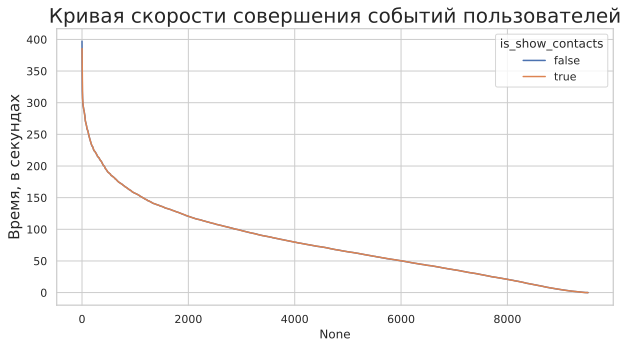

In [105]:
#посмотрим на кривую частоты совершения событий

sns.lineplot(x=temp_df_graf.index,
             y=temp_df_graf['events_per_time'],
             data=temp_df_graf,
             hue=temp_df_graf['is_show_contacts'])


plt.grid(True)
plt.title('Кривая скорости совершения событий пользователей', fontsize=20)
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

Графики практически наслаиваются друга на друга, построим боксплоты

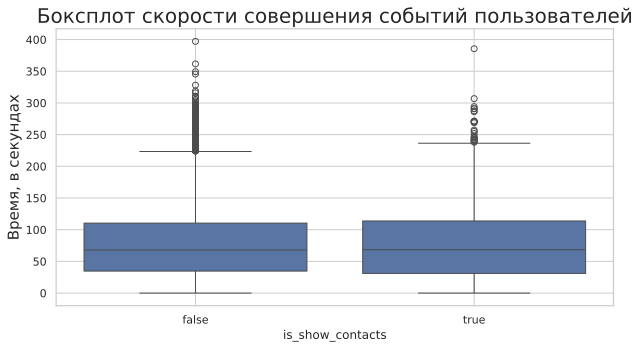

In [106]:
sns.boxplot(x=temp_df_graf['is_show_contacts'], y=temp_df_graf['events_per_time'], data=temp_df_graf)
plt.grid(True)
plt.title('Боксплот скорости совершения событий пользователей', fontsize=20)
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

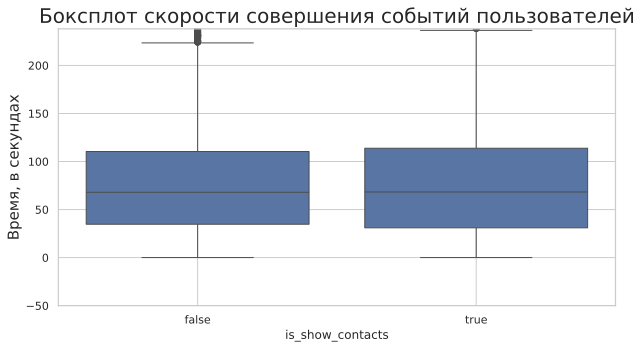

In [107]:
sns.boxplot(x=temp_df_graf['is_show_contacts'], y=temp_df_graf['events_per_time'], data=temp_df)
plt.ylim(-50, (temp_df_graf[temp_df_graf['is_show_contacts']=='true']['events_per_time'].quantile(0.75) -
               temp_df_graf[temp_df_graf['is_show_contacts']=='true']['events_per_time'].quantile(0.25))*1.5 +
               temp_df_graf[temp_df_graf['is_show_contacts']=='true']['events_per_time'].quantile(0.75))
plt.grid(True)
plt.title('Боксплот скорости совершения событий пользователей', fontsize=20)
plt.ylabel('Время, в секундах', fontsize=15)
plt.show();

In [108]:
temp_df_graf[temp_df_graf['is_show_contacts'] == 'false']['events_per_time'].describe().reset_index(
).rename(columns={'events_per_time': 'is_show_contacts_false'}).merge(
temp_df_graf[temp_df_graf['is_show_contacts'] == 'true']['events_per_time'].describe().reset_index(
).rename(columns={'events_per_time': 'is_show_contacts_true'})
)


,index,is_show_contacts_false,is_show_contacts_true
0,count,7741.00,1775.00
1,mean,78.85,78.65
2,std,58.68,59.02
3,min,0.00,0.00
4,25%,34.70,30.97
5,50%,67.98,68.31
6,75%,110.41,113.82
7,max,397.14,385.51


##### Вывод
Среднеарифметические показатели и медианные показатели скорости свершения событий для двух групп практически не отличаются. Более того, показатели 1-го, 3-го квартиля, максимальные и минимальные значения тоже приближены друг другу. На основании данных ящиков с усами можно сделать вывод, что в среднем, с пользователем происходит одно событие раз в 78 секунд, при этом медиана данного показателя в обоих случаях меньше ср. арфим, значит в данных много низкий значений


 ## Шаг 5. Проверка гипотез

### 5.1 Одни пользователи совершают действия `tips_show` и `tips_click` , другие — только `tips_show`. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.



Нулевая гипотеза (H0): конверсия в просмотры в контакты у пользователей совершивших действия `tips_show` и `tips_click` и у пользователей совершивших только `tips_show` - одинаковые

Альтернативная гипотеза (H1): конверсия в просмотры в контакты у пользователей совершивших действия `tips_show` и `tips_click` и у пользователей совершивших только `tips_show` - разные

In [109]:
#пользователи tips_show
tips_show_users = set(df[(df['event_name'] == 'tips_show')]['user_id'])
print('Всего пользователей, совершивших `tips_show`: ', len(tips_show_users))
#пользователи tips_click
tips_click_users = set(df[(df['event_name'] == 'tips_click')]['user_id'])
print('Всего пользователей, совершивших `tips_click`: ', len(tips_click_users))
#пользователи и того и другого
tips_show_and_click_users = tips_show_users & tips_click_users
print('Всего пользователей, совершивших и `tips_click` и `tips_show`: ', len(tips_show_and_click_users))
#пользователи с `tips_show` и без `tips_click`
tips_show_without_click_users = tips_show_users - tips_click_users
print('Всего пользователей, совершивших и `tips_click` и не совершивших `tips_show`: ', len(tips_show_without_click_users))

Всего пользователей, совершивших `tips_show`:  2801
Всего пользователей, совершивших `tips_click`:  322
Всего пользователей, совершивших и `tips_click` и `tips_show`:  297
Всего пользователей, совершивших и `tips_click` и не совершивших `tips_show`:  2504


In [110]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if (p_value < alpha):
        display('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

In [111]:
#отфильтруем датафрейм под условие "пользователей совершивших только `tips_show`" и оставим только уникальных пользователей и события
tips_show_users_df = df[df['user_id'].isin(tips_show_without_click_users)==True].drop_duplicates(subset=['user_id', 'event_name'])


#отфильтруем датафрейм под условие "совершивших действия `tips_show` и `tips_click`" и оставим только уникальных пользователей и события
tips_show_and_click_users_df = df[df['user_id'].isin(tips_show_and_click_users)==True].drop_duplicates(subset=['user_id', 'event_name'])

In [112]:
print('Уникальных пользователей, совершивших только `tips_show`:',tips_show_users_df['user_id'].unique().shape[0])
print('Уникальных пользователей, совершивших только `tips_show` и перешедших в целевое действие:',
      tips_show_users_df[tips_show_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0])
print('Уникальных пользователей, совершивших действия `tips_show` и `tips_click:',tips_show_and_click_users_df['user_id'].unique().shape[0])
print('Уникальных пользователей, совершивших действия `tips_show` и `tips_click` и перешедших в целевое действие:',
      tips_show_and_click_users_df[tips_show_and_click_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0])

Уникальных пользователей, совершивших только `tips_show`: 2504
Уникальных пользователей, совершивших только `tips_show` и перешедших в целевое действие: 425
Уникальных пользователей, совершивших действия `tips_show` и `tips_click: 297
Уникальных пользователей, совершивших действия `tips_show` и `tips_click` и перешедших в целевое действие: 91


In [113]:
z_test(successes1 = tips_show_users_df[tips_show_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0],
       successes2 = tips_show_and_click_users_df[tips_show_and_click_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0],
       trials1 = tips_show_users_df['user_id'].unique().shape[0],
       trials2 = tips_show_and_click_users_df['user_id'].unique().shape[0],
       alpha=0.05)

p-значение:  9.218316554537864e-09


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

In [114]:
print('Конверсия в целевое действие группы пользователей, которые совершили только `tips_show`: {:.2f}%'.format(
    tips_show_users_df[tips_show_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0] /
    tips_show_users_df['user_id'].unique().shape[0]*100))

print('Конверсия в целевое действие группы пользователей, которые совершили `tips_show` и `tips_click`: {:.2f}%'.format(
    tips_show_and_click_users_df[tips_show_and_click_users_df['event_name'] == 'show_contacts']['user_id'].unique().shape[0] /
    tips_show_and_click_users_df['user_id'].unique().shape[0]*100))


Конверсия в целевое действие группы пользователей, которые совершили только `tips_show`: 16.97%
Конверсия в целевое действие группы пользователей, которые совершили `tips_show` и `tips_click`: 30.64%


### 5.2 Некоторые пользователи используют приложение только днем[7:21], а другие - ночью[22:6]. Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов


Нулевая гипотеза (H0): конверсия в просмотры в контакты у пользователей, использующих приложение ночью и использующих приложение днем одинаковая

Альтернативная гипотеза (H1): конверсия в просмотры в контакты у пользователей, использующих приложение ночью и использующих приложение днем разная

In [115]:
#ночной датасет
temp_night = df[(df['event_time'].dt.hour>=22) | (df['event_time'].dt.hour <= 6)]
#проставляем конверсию
temp_night['target_action'] = temp_night['user_id'].isin(temp_night[temp_night['event_name'] == 'show_contacts']['user_id'].unique())
temp_night['target_action'].replace({False: 0, True: 1}, inplace=True)

#дневной датасет
temp_day = df[(df['event_time'].dt.hour < 22) & (df['event_time'].dt.hour > 6)]
#проставляем конверсию
temp_day['target_action'] = temp_day['user_id'].isin(temp_day[temp_day['event_name'] == 'show_contacts']['user_id'].unique())
temp_day['target_action'].replace({False: 0, True: 1}, inplace=True)

In [116]:
# список с юзерами, попавшими в обе группы
users_in_two_df = list(set(temp_night['user_id']) & set(temp_day['user_id']))
len(users_in_two_df)

690

In [117]:
#убираем юзеров, попавших и туда и туда
temp_night = temp_night[temp_night['user_id'].isin(users_in_two_df) == False]
temp_day = temp_day[temp_day['user_id'].isin(users_in_two_df) == False]

In [118]:
print('Уникальных ночных пользователей: ',temp_night['user_id'].unique().shape[0])
print('Уникальных ночных пользователей и перешедших в целевое действие: ',temp_night[temp_night['target_action'] == 1]['user_id'].unique().shape[0])
print('Уникальных дневных пользователей: ', temp_day['user_id'].unique().shape[0])
print('Уникальных дневных пользователей и перешедших в целевое действие: ', temp_day[temp_day['target_action'] == 1]['user_id'].unique().shape[0])

Уникальных ночных пользователей:  389
Уникальных ночных пользователей и перешедших в целевое действие:  42
Уникальных дневных пользователей:  3214
Уникальных дневных пользователей и перешедших в целевое действие:  715


In [119]:
z_test(successes1 = temp_night[temp_night['target_action'] == 1]['user_id'].unique().shape[0],
       successes2 = temp_day[temp_day['target_action'] == 1]['user_id'].unique().shape[0],
       trials1 = temp_night['user_id'].unique().shape[0],
       trials2 = temp_day['user_id'].unique().shape[0],
       alpha=0.05)

p-значение:  1.646130181054417e-07


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

In [120]:
print('Конверсия в целевое действие группы ночных пользователей: {:.2f}%'.format(
    temp_night[temp_night['target_action'] == 1]['user_id'].unique().shape[0] /
    temp_night['user_id'].unique().shape[0]*100))

print('Конверсия в целевое действие группы дневных пользователей: {:.2f}%'.format(
    temp_day[temp_day['target_action'] == 1]['user_id'].unique().shape[0] /
    temp_day['user_id'].unique().shape[0]*100))

Конверсия в целевое действие группы ночных пользователей: 10.80%
Конверсия в целевое действие группы дневных пользователей: 22.25%


### 5.3 Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов



Нулевая гипотеза (H0): конверсия в просмотры в контакты у пользователей пришедших из `yandex` и `google` одинаковые

Альтернативная гипотеза (H1): конверсия в просмотры в контакты у пользователей пришедших из `yandex` и `google` разные

In [121]:
# добавляем столбик с булевым значением на каждую строчку, где есть `show_contacts`
df['target_action'] = df['user_id'].isin(df[df['event_name'] == 'show_contacts']['user_id'].unique())
df['target_action'].replace({False: 0, True: 1}, inplace=True)
temp = df.drop_duplicates(subset=['user_id'])


In [122]:
print('Уникальных пользователей google: ',temp[temp['source'] == 'google']['user_id'].unique().shape[0])
print('Уникальных пользователей google, перешедших в целевое действие: ',
      temp[(temp['source'] == 'google') & (temp['target_action'] == 1)]['user_id'].unique().shape[0])
print('Уникальных пользователей yandex: ', temp[temp['source'] == 'yandex']['user_id'].unique().shape[0])
print('Уникальных пользователей yandex, перешедших в целевое действие: ',
      temp[(temp['source'] == 'yandex') & (temp['target_action'] == 1)]['user_id'].unique().shape[0])

Уникальных пользователей google:  1129
Уникальных пользователей google, перешедших в целевое действие:  275
Уникальных пользователей yandex:  1934
Уникальных пользователей yandex, перешедших в целевое действие:  478


In [123]:
z_test(successes1 = temp[(temp['source'] == 'google') & (temp['target_action'] == 1)]['user_id'].unique().shape[0],
       successes2 = temp[(temp['source'] == 'yandex') & (temp['target_action'] == 1)]['user_id'].unique().shape[0],
       trials1 = temp[temp['source'] == 'google']['user_id'].unique().shape[0],
       trials2 = temp[temp['source'] == 'yandex']['user_id'].unique().shape[0],
       alpha=0.05)

p-значение:  0.8244316027993777


'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет'

In [124]:
print('Конверсия в целевое действие группы пользователей из `google`: {:.2f}%'.format(
    temp[(temp['source'] == 'google') & (temp['target_action'] == 1)]['user_id'].unique().shape[0] /
    temp[temp['source'] == 'google']['user_id'].unique().shape[0]*100))

print('Конверсия в целевое действие группы пользователей из `yandex`: {:.2f}%'.format(
    temp[(temp['source'] == 'yandex') & (temp['target_action'] == 1)]['user_id'].unique().shape[0] /
    temp[temp['source'] == 'yandex']['user_id'].unique().shape[0]*100))

Конверсия в целевое действие группы пользователей из `google`: 24.36%
Конверсия в целевое действие группы пользователей из `yandex`: 24.72%


## Вывод и рекомендации

Проведя аналитическую работу над датасетом "Мобильные приложения" можно сделать следующие выводы:


* пользователи, которые совершают действия `tips_show` и `tips_click` и пользователи, которые совершают только `tips_show`, показывают разную конверсию в целевое действие
* пользователи, использующие приложение в ночное время и использующие приложение в дневное время показывают разную конверсию в целевое действие
* пользователи, пришедшие из `google` и `yandex` показывают одинаковую конверсию в целевое действие
* есть явная проблема с событиями, несколько событий может случиться меньше чем за секунду
* сценарий `'map' - 'tips_show' - 'show_contacts'` показывает конверсию в целевое действие = `9%`
* сценарий `'tips_show' - 'show_contacts'` показывает конверсию в целевое действие = `14%`
* сессии, в которых было целевое действие в среднем длятся дольше, чем сессии, в которых целевое действие не состоялось
* возращаемость пользователей резко падает на второй день лайфтайма и к последнему дню показатели равны от `1%` до `6%`, в зависимости от когорты
* пользователи, которые просматривают контакты, чаще всего совершают действие `tips_show`, что кажется логичным, так как самые популярные сценарии включают данное событие
* конверсия в целевое действие у пользователей, увидивших `tips_show` - `16.97%`, а конверсия в целевое действие у пользователей, увидивших которые увидели `tips_show` и совершили `tips_click`- `30.64%`, что говорит о том, что рекомендации работают
* длительность сессий с целевым действием и длительность сессий без целевого действия почти не различаются


Рекомендации:
* в логах обнаружились сессии, в которых тайм аут между событиями очень маленький, возможно, это такая запись лога, но свершение нескольких событий меньше, чем за 1 секунду, кажется странным, стоит обратить на это внимание
* сценарии, в которых был показан пользователю `tips_show` показывают хорошую конверсию в целевое действие, также конверсия в целевое действие у пользователей, увидивших `tips_show` - `16.97%` и `tips_show` является самым популярным событием, которое случается с пользователями, совершившими целевое действие. Все это говорит о том, что рекомендации приложения работают, возможно, стоит увеличить частоту появления рекомендаций у пользователей, для увеличения конверсии
* дневные пользователи также показывают конверсию в целевое действие больше, чем ночные пользователи, возможно, можно попробовать больше рекомендаций подсовывать ночным пользователям
* нам известно, что приложение зарабатывает за счет продвижения платных объявлений, возможно, какая-то система дейли чек-ина, как возможность поднять свое объявление повыше могла бы повысить retention rate и, возможно, конверсию
* к выходным наблюдается спад активности пользователей, в эти дни можно присылать больше уведомлений, чтобы повышать активность
